In [1]:
from math import *
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt

from pint import UnitRegistry, set_application_registry
ureg = UnitRegistry()
set_application_registry(ureg)

litros = ureg.litre
atmosferas = ureg.atmosphere
moles = ureg.mol
kelvins = ureg.kelvin
kilogramos = ureg.kilogram
gramos = ureg.gram
kilometros = ureg.kilometer
metros = ureg.meter
centimetros = ureg.centimeter
nanometros = ureg.nanometer
femtometros = ureg.femtometer
fermis = ureg.femtometer
julios = ureg.joule
kilojulios = ureg.kilojoule
pascales = ureg.pascal
newtons = ureg.newton
teslas = ureg.tesla
culombios = ureg.coulomb
amperios = ureg.ampere
faradios = ureg.farad
segundos = ureg.second
nanosegundos = ureg.nanosecond
horas = ureg.hour
eV = ureg.electron_volt
MeV = ureg.megaelectron_volt
keV = ureg.kiloelectron_volt
GeV = ureg.gigaelectron_volt
Å = ureg.angstrom

vatios = ureg.watts
μW = ureg.microwatts

c = ureg.speed_of_light

Q = ureg.Quantity

h = 6.628e-34 * julios * segundos 
ℏ = h / ( 2 * pi )

ℏc = 200 * eV * nanometros

atmosfera = 101327.38879319 * newtons / metros**2

µ0 = 4 * pi * 1e-7 * teslas * metros / amperios
𝜀0 = 1 / ( µ0 * c**2)
print(𝜀0.to(faradios / metros))

8.85418781762039e-12 farad / meter


https://pdg.lbl.gov/2020/reviews/rpp2020-rev-phys-constants.pdf

a) Estimar la velocidad de un electr´on en un ´atomo, de un prot´on en un n´ucleo y de un quark
en un prot´on. Indicar en cada caso si se trata de objetos en movimiento relativista. Utilizar
como datos las masas de los constituyentes y las energ´ıas de enlace t´ıpicas de cada uno de los
tres sistemas.

b) Estimar las densidades de masa/energ´ıa de un ´atomo, de un n´ucleo y de un
prot´on en funci´on de las caracter´ısticas de ”sus constituyentes”.

In [2]:
m_electron = 0.511 * MeV / c**2
Ec_electron = 13.6 * eV

# E**2 = p**2 * c**2 + m**2 * c**4
# E = Ec + m * c**2

# ( Ec + m * c**2 )**2 = p**2 * c**2 + m**2 * c**4
# Ec**2 + 2 * Ec * m * c**2 + m**2 * c**4 = p**2 * c**2 + m**2 * c**4
# Ec**2 + 2 * Ec * m * c**2 = p**2 * c**2
# p**2 * c**2 = Ec**2 + 2 * Ec * m * c**2
# p * c = sqrt( Ec**2 + 2 * Ec * m * c**2 )
# λdb_electron = (ℏ * c) / (p * c)

# p = sqrt( ( Ec_electron**2 + 2 * Ec_electron * m_electron * c**2 ) / eV**2 ) * eV / c
p = ( Ec_electron**2 + 2 * Ec_electron * m_electron * c**2 ) ** (1/2) / c
print(p)
λdb_electron = (h * c) / (p * c)
print(λdb_electron.to(Å))
λdb_electron = (2 * pi * ℏ * c) / (p * c)
print(λdb_electron.to(Å))

# E = γ * m * c**2 = Ec + m * c**2
# γ = 1 + Ec / (m * c**2)

γ_electron = 1 + Ec_electron / (m_electron * c**2)
print(γ_electron)

β_electron = (1 - 1 / γ_electron**2 ) ** (1/2)
print(β_electron)
print(round(float(β_electron * 100), 3), '%')

# β_electron ≈ 0 , γ_electron ≈ 1 -> Aproximación Clásica
v_electron = β_electron * c
print(v_electron.to(kilometros / segundos))


3728.1878922607966 electron_volt / speed_of_light
3.326557366400755 angstrom
3.3265573664007553 angstrom
1.000026614481409 dimensionless
0.007295672546211436 dimensionless
0.73 %
2187.187605391845 kilometer / second


In [3]:
m_proton = 938.272 * MeV / c**2
Ec_proton = E_enlace_proton_neutron = 8 * MeV

γ_proton = 1 + Ec_proton / (m_proton * c**2)
print(γ_proton)

β_proton = (1 - 1 / γ_proton**2 ) ** (1/2)
print(β_proton)
print(round(float(β_proton * 100), 3), '%')

v_proton = β_proton * c
print(v_proton.to(kilometros / segundos))

1.0085263121994474 dimensionless
0.12975740297110303 dimensionless
12.976 %
38900.29078040348 kilometer / second


In [4]:
q_electron = 1.6e-19 * culombios
q_quark_up = q_electron * 2 / 3
q_quark_down = abs(- q_electron * 1 / 3)
q_proton = abs(- q_electron)
q_neutron = 0 * culombios

m_quark_up = 3 * MeV / c**2
m_quark_down = 5 * MeV / c**2

E_enlace_proton = (m_proton - 2 * m_quark_up - m_quark_down) * c**2
print(E_enlace_proton)

927.272 megaelectron_volt


In [5]:
E_enlace_quarks = (m_proton - 2 * m_quark_up - m_quark_down) * c**2 / 3
print(E_enlace_quarks)

m_quark = 3 * MeV / c**2
Ec_quark = E_enlace_quarks

γ_quark = 1 + Ec_quark / (m_quark * c**2)
print(γ_quark)

β_quark = (1 - 1 / γ_quark**2 ) ** (1/2)
print(β_quark)

v_quark = β_quark * c
print(v_quark.to(kilometros / segundos))

309.09066666666666 megaelectron_volt
104.03022222222222 dimensionless
0.9999537979777743 dimensionless
299778.6069821924 kilometer / second


In [6]:
r_atomo = 0.53 * Å # Radio de Bohr
V_atomo = 4 / 3 * pi * r_atomo**3
print(V_atomo.to(metros**3))

m_atomo = m_proton + m_electron
print(m_atomo.to(MeV / c**2))
ρ_atomo = m_atomo / V_atomo
print(ρ_atomo.to(kilogramos / metros**3))
print(ρ_atomo.to(gramos / centimetros**3))

E_enlace_atomo = Ec_electron = 13.6 * eV
ρe_atomo = E_enlace_atomo / V_atomo
print(ρe_atomo.to(newtons / metros**2))
print(ρe_atomo.to(pascales))

6.236145193179835e-31 meter ** 3
938.783 megaelectron_volt / speed_of_light ** 2
2683.601255150157 kilogram / meter ** 3
2.6836012551501573 gram / centimeter ** 3
3494081928405.1 newton / meter ** 2
3494081928405.1 pascal


In [7]:
# R = r0 * A**(1/3) = (1.25 fm) * A**(1/3)
# V = 4/3 * pi * R**3
# Energía_enlace / A = 8-9 MeV

r0 = 1.25 * fermis

# m_nucleo = Z * m_proton + (A - Z) * m_neutron
# m_neutron ≈ m_proton -> m_nucleo = A * m_proton
# V_nucleo = 4 / 3 * pi * r0 ** 3 * A
# ρ_nucleo = m_nucleo / V_nucleo = ( A * m_proton ) / ( 4 / 3 * pi * r0 ** 3 * A )

V_nucleo = ( 4 / 3 * pi * r0 ** 3 )
ρ_nucleo = m_proton / V_nucleo
print(ρ_nucleo.to(kilogramos / metros**3))
print(ρ_nucleo.to(gramos / centimetros**3))

E_enlace_nucleo = Ec_proton = 8 * MeV
ρe_nucleo = E_enlace_nucleo / V_nucleo
print(ρe_nucleo.to(newtons / metros**2))
print(ρe_nucleo.to(pascales))

2.0444622494691226e+17 kilogram / meter ** 3
204446224946912.28 gram / centimeter ** 3
1.5666851697096766e+32 newton / meter ** 2
1.5666851697096766e+32 pascal


In [8]:
ρm_proton = m_proton / ( 4 / 3 * pi * ( 1 * fermis )**3 )
print(ρm_proton.to(gramos / centimetros**3))

ρe_proton = E_enlace_proton / ( 4 / 3 * pi * ( 1 * fermis )**3 )
print(ρe_proton.to(newtons / metros**2))

print(atmosfera.to(newtons / metros**2))

399309033099438.1 gram / centimeter ** 3
3.5467365495288854e+34 newton / meter ** 2
101327.38879319 newton / meter ** 2


***

Representar la variaci´on de la energ´ıa de enlace por nucle´on en funci´on de A utilizando la
f´ormula semiemp´ırica de masas, y discutir la forma de las curvas de A constante, determinando
el ´o los valores de Z que corresponden a n´ucleos estables, describiendo la contribuci´on de cada
t´ermino de la f´ormula a dicha estabilidad.

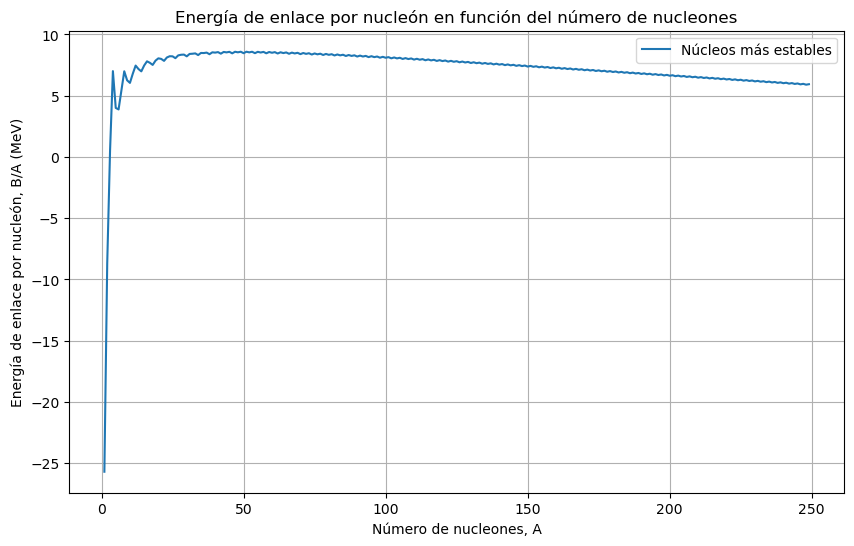

In [9]:
# https://estudiarfisica.com/2015/05/04/la-energia-nuclear-y-la-evolucion-estelar-energia-de-ligadura-formula-semiempirica-de-weizsacker-equilibrio-nuclear-radiaciones-%CE%B1%CE%B2-y-%CE%B3-nucleosintesis-estelar-y-diagramas-de-hertzs/

# Constantes
aV = 15.8 * MeV
aS = 18.3 * MeV
aC = 0.714 * MeV
aA = 23.2 * MeV
aP = 33.5 * MeV

# Término de emparejamiento
def δ(A, Z):
    if A % 2 == 1:
        return 0 * MeV
    elif Z % 2 == 0 and (A - Z) % 2 == 0:
        return +aP / A**(3/4)
    else:
        return -aP / A**(3/4)

# Energía de enlace por nucleón
def B_A(Z, A):
    return (
        aV
        - aS * A**(-1/3)
        - aC * Z * (Z-1) * A**(-4/3)
        - aA * (A - 2*Z)**2 / A**2
        + δ(A, Z) / A
    )

# Valores de A
A_values = np.arange(1, 250)

# Calcular B/A para N = Z (nucleos más estables)
B_values = [ float(B_A(A//2, A) / MeV ) for A in A_values ]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(A_values, B_values, label='Núcleos más estables')
plt.xlabel('Número de nucleones, A')
plt.ylabel('Energía de enlace por nucleón, B/A (MeV)')
plt.title('Energía de enlace por nucleón en función del número de nucleones')
plt.grid(True)
plt.legend()
plt.show()

Si tenemos un núcleo con una cantidad de nucleones A dada cabe preguntarse cuál es la cantidad de protones Z óptima para él. Atendiendo a la fórmula de la energía de ligadura, en este caso la gráfica de A frente a Z tendría forma de parábola, donde el valor de equilibrio Zeq sería el vértice y todos los núcleos con mayor y menor Z serían inestables en favor suyo, es decir, tenderían a tener Zeq protones.

Discusión de la estabilidad y contribución de cada término

    Término de volumen aV * A:
        Proporcional al número total de nucleones A.
        Refleja la energía de enlace que sería uniforme si todos los nucleones estuvieran igualmente enlazados.
        Contribuye positivamente a la energía de enlace, favoreciendo núcleos más grandes.

    Término de superficie aS * A**(2/3):
        Proporcional a la superficie del núcleo.
        Refleja la menor cohesión de los nucleones en la superficie comparados con los del interior.
        Contribuye negativamente a la energía de enlace, favoreciendo núcleos más pequeños.

    Término de Coulomb aC * Z * (Z - 1) / A**(1/3):
        Representa la repulsión electrostática entre protones.
        Contribuye negativamente a la energía de enlace, aumentando con el número de protones.
        Desfavorece núcleos con muchos protones, favoreciendo una relación equilibrada entre protones y neutrones.

    Término de asimetría aA * (A - 2*Z)**2 / A:
        Refleja la preferencia por tener un número igual de protones y neutrones.
        Contribuye negativamente a la energía de enlace cuando hay un desbalance entre protones y neutrones.
        Favorece núcleos donde Z ≈ N.

    Término de emparejamiento δ(A,Z):
        Considera la estabilidad adicional cuando el número de protones y neutrones son ambos pares.
        Puede ser positivo, negativo o cero, dependiendo de Z y N.

Estabilidad nuclear

Para un valor dado de AA, el valor de Z que corresponde a un núcleo estable maximiza la energía de enlace. En general, el número de protones Z para núcleos estables es tal que minimiza la contribución negativa de los términos de Coulomb y asimetría.

Para un valor dado de A, el número de protones Z para un núcleo estable se puede aproximar usando la relación empírica:

Z ≈ A / (2 + aC / (4*aA) * A**(2/3) )

En conclusión, la variación de la energía de enlace por nucleón en función de AA muestra un máximo cerca de A≈56, que corresponde a los núcleos más estables (como el hierro). Los núcleos más pequeños y más grandes tienen una energía de enlace por nucleón menor, debido a la contribución de los términos de superficie, Coulomb y asimetría.

Extrapolar la misma f´ormula a una estrella de neutrones, (materia nuclear), y determinar el
valor de A, para el que dicho sistema es estable, si se considera adem´as que posee energ´ıa
potencial gravitatoria. Suponer por simplicidad, una esfera uniforme.

La energía de enlace nuclear de una estrella de neutrones (asumiendo materia nuclear pura) se puede aproximar utilizando la fórmula semiempírica de masas sin los términos que dependen del número de protones Z, ya que en una estrella de neutrones Z≈0. Simplificamos la fórmula para la energía de enlace:

Aquí, el término de Coulomb y el término de emparejamiento se pueden omitir ya que no son relevantes para una estrella de neutrones compuesta casi enteramente por neutrones. Simplificamos aún más:


In [10]:
# E_total_estrella = E_enlace_estrella + E_gravitatoria_estrella
# E_enlace_estrella = aV * A - aS * A**(2/3) - aC * Z**2 * A**(-1/3) - aA * (A - 2*Z)**2 * A**(-1) + δ(A, Z)
# E_enlace_estrella = aV * A - aS * A**(2/3) - aA * A = (aV - aA) * A - aS * A**(2/3)
# https://es.wikipedia.org/wiki/Energ%C3%ADa_de_cohesi%C3%B3n_gravitacional
# E_gravitatoria_estrella = 3/5 * G * m_estrella**2 / R_estrella
# R_estrella = r0 * A**(1/3)
# m_estrella = A * m_neutron

# E_total_estrella = (aV - aA) * A - aS * A**(2/3)  +  3/5 * G * (A * m_neutron)**2 / ( r0 * A**(1/3) ) > 0
# (aV - aA) - aS * A**(-1/3)  +  3/5 * G * A**(2/3) * m_neutron**2 / r0 > 0
# 3/5 * G * A**(2/3) * m_neutron**2 / r0  - aS * A**(-1/3)  >  - (aV - aA)
# A >> 0 -> A**(-1/3) tiende a cero, mientras que A**(2/3) tiende a infinito
# 3/5 * G * A**(2/3) * m_neutron**2 / r0  >  - (aV - aA)

aV = 15.74 * MeV
aS = 17.62 * MeV
aC = 0.72 * MeV
aA = 23.42 * MeV
aP = 11.2 * MeV

r0 = 1.25 * fermis
G = 6.674e-11 * metros**3 / kilogramos / segundos**2
m_neutron = 939.565 * MeV / c**2
A = ( -(aV - aA) * (5 / 3) * r0 / G / m_neutron**2 ) ** (3/2)
print(aV.to(MeV))
print(aA.to(MeV))
print(r0.to(metros))
print(G)
print(m_neutron.to(kilogramos))
print(A.to_base_units())

R_estrella = r0 * A**(1/3)
print(R_estrella.to(kilometros))

R_tierra = 6.378 * kilometros
m_tierra = 5.972e24 * kilogramos
m_estrella = A * m_neutron
print((R_estrella / R_tierra).to_base_units())
print((m_estrella / m_tierra).to_base_units())

15.74 megaelectron_volt
23.42 megaelectron_volt
1.2500000000000002e-15 meter
6.674e-11 meter ** 3 / kilogram / second ** 2
1.674926748394316e-27 kilogram
5.066158888562047e+55 dimensionless
4.625261395185449 kilometer
0.7251899333937675 dimensionless
14208.715730187856 dimensionless


***

4. Estudiar la emisi´on de part´ıculas α por el 238
92 U146, con energ´ıa cin´etica, Ec
α = 4.2 M eV . El
n´ucleo producido en este proceso, es el 234
90 T h144. Determinar, la velocidad de la part´ıcula α
dentro del n´ucleo, y su frecuencia de colisi´on con la barrera. Obtener la altura de la barrera en
MeV, y estimar su anchura en fm.

In [11]:
A_U = 238
Z_U = 92
A_Th = 234
Z_Th = 90

# R = r0 * A**(1/3) = (1.25 fm) * A**(1/3)
# V = 4/3 * pi * R**3
# Energía_enlace / A = 8-9 MeV

r0 = 1.25 * fermis
R_U = r0 * A_U**(1/3)
print(R_U.to(metros))

U_altura = (Z_U - 2) * q_electron * 2 * q_electron / ( 4 * pi * 𝜀0 * R_U )
print(U_altura.to(MeV))

7.746443043426408e-15 meter
33.36884314700569 megaelectron_volt


In [12]:
Ec_α = 4.2 * MeV
m_α = 2 * m_proton + 2 * m_neutron
print(m_α.to(MeV/c**2))
V_α = (2 * Ec_α / m_α)**(1/2)
print(V_α.to(metros/segundos))
print(V_α.to(c))
r0 = 1.25 * fermis
υ_α = V_α / (2 * R_U)
print(υ_α.to(1/segundos))

3755.674 megaelectron_volt / speed_of_light ** 2
14178046.688558904 meter / second
0.04729287315346307 speed_of_light
9.151327008458626e+20 / second


In [13]:
# U(R) = (Z_U - 2) * q_electron * 2 * q_electron / ( 4 * pi * 𝜀0 * R )
# Ec_α = (Z_U - 2) * q_electron * 2 * q_electron / ( 4 * pi * 𝜀0 * R )
R_b = (Z_U - 2) * q_electron * 2 * q_electron / ( 4 * pi * 𝜀0 * Ec_α)
print(R_b.to(fermis))

61.545200681740276 femtometer


In [14]:
Δ = R_b - R_U
print(Δ.to(fermis))

53.798757638313866 femtometer


***

5. Estimar el rango de las interacciones fuerte, e.m. y d´ebil en funci´on de la masa de la part´ıcula
que se intercambia en cada caso y de las propiedades de cada interacci´on. Se puede usar el
principio de de Broglie o el principio de incertidumbre.

 El principio de incertidumbre de Heisenberg

El producto de la incertidumbre en la posición de una partícula y la incertidumbre en su momento nunca puede ser inferior a la mitad de la constante de Planck reducida:
Δx Δp ≥ ℏ/2

Otro tipo de principio de incertidumbre se refiere a las incertidumbres en las mediciones simultáneas de la energía de un estado cuántico y su tiempo de vida,
ΔEΔt ≥ ℏ2

https://openstax.org/books/f%C3%ADsica-universitaria-volumen-3/pages/7-2-el-principio-de-incertidumbre-de-heisenberg


de Broglie propuso que una partícula como un electrón podría ser descrita por una onda cuya longitud de onda está dada por

λ = h / (m * v)

h es la constante de Planck,
m es la masa de la partícula, y
v es la velocidad de la partícula.

https://espanol.libretexts.org/Quimica/Qu%C3%ADmica_General/Mapa%3A_Qu%C3%ADmica_-_La_naturaleza_molecular_de_la_materia_y_el_cambio_(Silberberg)/07%3A_Teor%C3%ADa_cu%C3%A1ntica_y_estructura_at%C3%B3mica/7.03%3A_La_dualidad_onda-part%C3%ADcula_de_la_materia_y_la_energ%C3%ADa 

https://www.vaia.com/en-us/textbooks/physics/university-physics-3-edition/chapter-11/problem-54-using-the-heisenberg-uncertainly-principle-determ/

https://physics.stackexchange.com/questions/180828/how-can-the-uncertainty-principle-be-used-to-deduce-range-of-a-force-from-proper

https://van.physics.illinois.edu/ask/listing/29660

  Z boson: 91.19 GeV
  W boson: 80,38 GeV
  http://onlyspacetime.com/Chapter_12.pdf


In [15]:
# EM force

# m_foton = 0
# r -> ∞

# Weak force

# Energy-time uncertainty relationship: ΔE * Δt ≥ ℏ / 2
# Energy uncertainty using the Z boson mass

m_Zboson = 91.19 * GeV / c**2
ΔE = m_Zboson * c**2
Δt = ℏ / 2 / ΔE
print(Δt.to(segundos))
r = c * Δt
print(r.to(fermis))

m_Wboson = 80.38 * GeV / c**2
ΔE = m_Wboson * c**2
Δt = ℏ / 2 / ΔE
print(Δt.to(segundos))
r = c * Δt
print(r.to(fermis))

# Strong Force

m_π0 = 134.9766 * MeV / c**2
ΔE = m_π0 * c**2
Δt = ℏ / 2 / ΔE
print(Δt.to(segundos))
r = c * Δt
print(r.to(fermis))


3.610065039398846e-27 second
0.0010822702717012463 femtometer
4.095568934346613e-27 second
0.0012278206777362112 femtometer
2.438954833228727e-24 second
0.7311802644046201 femtometer


6. a) Explicar por qu´e la fuerza fuerte es de corto alcance, rango del orden del fm, mientras que
la fuerza e.m. posee rango infinito, considerando que tanto la masa del g como la del γ son
cero. b) Explicar como a pesar de que el neutr´on tiene una vida media τn = 880.2 ± 1.0 s.
existen centenares de n´ucleos estables compuestos de protones y neutrones

7. La funci´on de trabajo del W es de 5.4 eV . Cuando se ilumina una superficie de W con luz de
λ 175 nm la m´axima energ´ıa de los electrones emitidos es de 1.7 eV . A partir de estos datos,
obtener la constante de Planck.

9. Un haz de luz de intensidad I = 10 μW/cm2 incide sobre 1 cm2 de F e. Suponer que un 96%
de la luz se refleja, y que un 3% de la misma posee una λ = 250 nm (λumbral). Determinar
la intensidad de la luz capaz de producir la emisi´on de fotoelectrones, y el n´umero de los
mismos que se produce por unidad de tiempo. Obtener la corriente el´ectrica debida a dichos
fotoelectrones, y la funci´on de trabajo del F e.

In [19]:
I = 10 * μW / centimetros**2
A_Fe = 1 * centimetros**2
reflejo = 0.96

Ief = I * (1 - 0.96) * 0.03 * A_Fe
print(Ief.to(vatios))

λumbral = 250 * nanometros

Efoton = h * c / λumbral
print(Efoton.to(julios))
Nf = Ief / Efoton
print(Nf.to_base_units())

# Cada fotón arranca un electrón

Ne = Nf
Ie = Ne * q_electron
print(Ie.to_base_units())

Ecinetica = 0 * eV
Eincidente = Efoton
Φ = Eincidente - Ecinetica
print(Φ.to(eV))


1.200000000000001e-08 watt
7.9480976464959985e-19 joule
15097952407.882574 / second
2.4156723852612116e-09 ampere
4.960812358530501 electron_volt


10. A una distancia de 1 m. de una fuente luminosa de 1 w. se coloca una placa de K. Suponer
que cada fotoelectr´on emitido recibe su energ´ıa de un ´area cuyo radio es del orden del radio
at´omico que es de 10−10m. La energ´ıa necesaria para extraer un e− de la superficie del K es de
2.1 eV. Suponiendo que la energ´ıa de la onda e.m. est´a distribuida uniformemente en su frente
de onda, determinar el tiempo que tardar´ıa el blanco en recibir una energ´ıa de 2.1 eV

In [29]:
distancia = 1 * metros
potencia = 1 * vatios

Enecesaria = 2.1 * eV

I = potencia / ( 4 * pi * distancia**2 )
Aatomo = pi * ( 1e-10 * metros )**2 

potencia_recibida = I * Aatomo
print(potencia_recibida.to(eV/segundos))

# E = W * t -> t = E / W
print((Enecesaria /potencia_recibida).to(segundos))

0.01560377268615191 electron_volt / second
134.582837256 second


11. a) Luz de λ = 4 × 10−7 m. incide perpendicularmente sobre una superficie met´alica plana
con 10−6 w m−2. Determinar el n´umero de γ que inciden por unidad de ´area y tiempo. b) Una
superficie met´alica iluminada por luz de λ = 3.5 × 10−7 m. emite e− cuya m´axima energ´ıa
cin´etica es 0.60 eV. La misma superficie se ilumina con luz de λ = 2.5 × 10−7 m. emitiendo
en ese caso e− cuya m´axima energ´ıa cin´etica es 2.02 eV. A partir de estos datos determinar la
constante de Planck y la funci´on de trabajo del metal en eV.

In [39]:
λ = 4e-7 * metros
I = 1e-6 * vatios / metros**2
print(I.to(eV / metros**2 / segundos))
Efoton = h * c / λ
print(Efoton.to(eV))
print((I / Efoton).to(1 / metros**2 / segundos))


6241509074460.763 electron_volt / meter ** 2 / second
3.1005077240815644 electron_volt
2013060321051.0078 / meter ** 2 / second


In [ ]:
λ1 = 3.5e-7 * metros
Ec_max = 0.60 * eV
λ2 = 2.5e-7 * metros


***

14. Un haz de rayos X monocrom´aticos se dirige hacia electrones en reposo. Tras la colisi´on se
observa un electr´on con Ec = 400 keV , mientras que el γ tiene una longitud de onda el doble
que antes de la colisi´on. a) Calcular la energ´ıa del γ y λγ del haz incidente. b) Calcular el
´angulo que se desv´ıa el fot´on de su direcci´on inicial. c) Calcular la energ´ıa total y |⃗p | del e−
tras la colisi´on asi como su direcci´on respecto a la del γ inicial

In [ ]:
Ec = 400 * keV

# λγ_ini
# λγ_fin = 2 * λγ_ini

# Eγ_ini = h * c / λγ_ini
# Eγ_fin = h * c / (λγ_ini * 2)
# Eγ_ini = 
